In [16]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn import ensemble
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Функции

In [52]:
def data_prep (data, type):
    if data.__contains__ ('Unnamed: 0'):
        data = data.drop (columns = ['Unnamed: 0'])
    types = ['E/I', 'N/S', 'F/T', 'P/J']
    types.remove (type)

    data = data.drop (columns = types)
    max_size = data [type].value_counts ().max ()
    lst = [data]
    for class_index, group in data.groupby (type):
        lst.append (group.sample (max_size - len (group), replace = True))
    data = pd.concat (lst)

    labels = data [type]
    data = data.drop (columns = [type])

    data = pd.DataFrame (data ['vectorized'].tolist ())
    #lst = data ['vectorized'].tolist ()
    #dataInt = []
    #for i in lst:
    #    i = i.replace ('[', '')
    #    i = i.replace (']', '')
    #    vec = []
    #    lstStr = i.split (', ')
    #    for j in lstStr:
    #        vec.append (int (j))
    #    dataInt.append (vec)

    #listData = pd.DataFrame (dataInt)

    return data, labels

In [9]:
def showMetrics (model, data, labels):
    prediction = model.predict (data)
    print ('Accuracy: ', accuracy_score (labels, prediction))
    print ('Precision: ', precision_score (labels, prediction))
    print ('Recall: ', recall_score (labels, prediction))
    ConfusionMatrixDisplay.from_predictions (labels, prediction)

In [10]:
def fitNshow (maxDepth, maxFeatures, minSamplesLeaf, minSamplesSplit, nEstimators, trainData, testData, trainLabels, testLabels): 
    forest = RandomForestClassifier(max_depth = maxDepth, 
                                    max_features = maxFeatures, 
                                    min_samples_leaf = minSamplesSplit, 
                                    min_samples_split = minSamplesSplit, 
                                    n_estimators = nEstimators)
    forest.fit(trainData, trainLabels)
    showMetrics (forest, testData, testLabels)

## Создание датасета

In [11]:
data = pd.read_csv ('lemmatized-bestTranslate.csv')

In [17]:
vectorizer = TfidfVectorizer (max_features = 10000, analyzer = 'word', token_pattern = '[^ ]+', lowercase = False, strip_accents = 'unicode')
data ['vectorized'] = vectorizer.fit_transform (data ['lemmatized']).todense ().tolist ()

In [19]:
data = data.drop (columns = ['lemmatized'])

In [53]:
EIData, EILabels = data_prep (data, 'E/I')
NSData, NSLabels = data_prep (data, 'N/S')
FTData, FTLabels = data_prep (data, 'F/T')
PJData, PJLabels = data_prep (data, 'P/J')


In [54]:
EITrainData, EITestData, EITrainLabels, EITestLabels = train_test_split (EIData, EILabels, train_size = 0.8, random_state = 1)
NSTrainData, NSTestData, NSTrainLabels, NSTestLabels = train_test_split (NSData, NSLabels, train_size = 0.8, random_state = 1)
FTTrainData, FTTestData, FTTrainLabels, FTTestLabels = train_test_split (FTData, FTLabels, train_size = 0.8, random_state = 1)
PJTrainData, PJTestData, PJTrainLabels, PJTestLabels = train_test_split (PJData, PJLabels, train_size = 0.8, random_state = 1)

## Обучение

In [48]:
type (EITrainLabels)

pandas.core.series.Series

Accuracy:  0.9011606140022463
Precision:  0.842002600780234
Recall:  0.9840425531914894


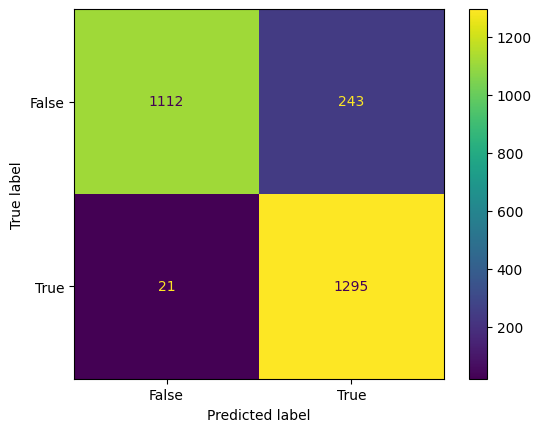

In [55]:
#None, 5, 1, 3, 200
#None, 9, 2, 4, 400
#None, 12, 4, 3, 600
fitNshow (None, 5, 1, 3, 200, EITrainData, EITestData, EITrainLabels, EITestLabels)

Accuracy:  0.9341357405549984
Precision:  0.9403884795713329
Recall:  0.9285714285714286


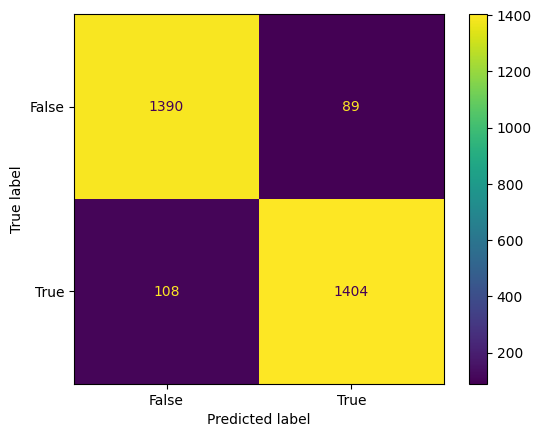

In [ ]:
fitNshow (None, 9, 2, 4, 400, NSTrainData, NSTestData, NSTrainLabels, NSTestLabels)

Accuracy:  0.7566560170394037
Precision:  0.7746636771300448
Recall:  0.7296726504751848


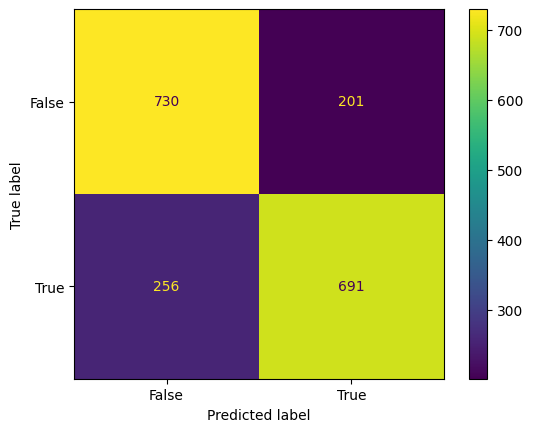

In [ ]:
fitNshow (None, 5, 1, 3, 200, FTTrainData, FTTestData, FTTrainLabels, FTTestLabels)

Accuracy:  0.7272293752980449
Precision:  0.7394957983193278
Recall:  0.6848249027237354


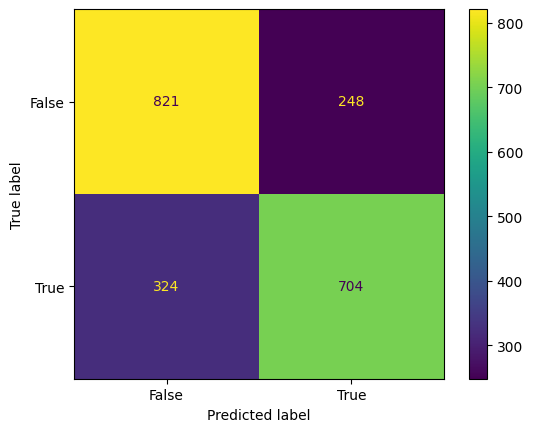

In [ ]:
fitNshow (None, 5, 1, 3, 200, PJTrainData, PJTestData, PJTrainLabels, PJTestLabels)

In [ ]:
#forest = GridSearchCV(RandomForestClassifier(), 
#                    {'bootstrap': [True],
#                     'ccp_alpha': [0.0],
#                     'class_weight': [None],
#                     'criterion': ['gini'],
#                     'max_depth': [None],#
#                     'max_features': ['sqrt'],#
#                     'max_leaf_nodes': [None],
#                     'max_samples': [None],
#                     'min_impurity_decrease': [0.0],
#                     'min_samples_leaf': [1],#
#                     'min_samples_split': [4],#
#                     'min_weight_fraction_leaf': [0.0],
#                     'n_estimators': [550],#
#                     'n_jobs': [None],
#                     'oob_score': [False],
#                     'random_state': [None],
#                     'verbose': [0],
#                     'warm_start': [False]
#                    })
#forest.fit(PJTrainData, PJTrainLabels)
#print (forest.best_params_, forest.best_score_, sep='\n')
#showMetrics (forest, PJTestData, PJTestLabels)

In [ ]:
print(forest.best_params_, forest.best_score_, sep='\n')

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 525, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.8004770423375074


EI

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

NS



| EIAccuracy      | Старый датасет | Новый датасет |
| --------------- |:-------:| -------:|
| Набор пар-ов №1 | 0.90823 | 0.89662 |
| Набор пар-ов №2 | 0.91797 | 0.90486 |
| Набор пар-ов №3 | 0.93071 | 0.91610 |
| Без подбора     | 0.94232 | 0.94119 |

| NSAccuracy      | Старый датасет | Новый датасет |
| --------------- |:-------:| -------:|
| Набор пар-ов №1 | 0.93513 | 0.93714 |
| Набор пар-ов №2 | 0.93814 | 0.93848 |
| Набор пар-ов №3 | 0.94684 | 0.95018 |
| Без подбора     | 0.97024 | 0.97191 |

| FTAccuracy      | Старый датасет | Новый датасет |
| --------------- |:-------:| -------:|
| Набор пар-ов №1 | 0.76783 | 0.76570 |
| Набор пар-ов №2 | 0.77582 | 0.79179 |
| Набор пар-ов №3 | 0.79126 | 0.78647 |
| Без подбора     | 0.79605 | 0.80085 |

| PJAccuracy      | Старый датасет | Новый датасет |
| --------------- |:-------:| -------:|
| Набор пар-ов №1 | 0.76013 | 0.74391 |
| Набор пар-ов №2 | 0.76680 | 0.76204 |
| Набор пар-ов №3 | 0.77968 | 0.78206 |
| Без подбора     | 0.80209 | 0.79351 |